In [30]:
## In this we checked for different pharmacophore features of molecules.

In [31]:
## Utils import
import pandas as pd
import tqdm as tqdm

In [32]:
data = pd.read_excel("MC variants.xlsx")

In [33]:
data_with_smiles = data[~data["SMILES"].isna()]

In [34]:
from rdkit import Chem
from rdkit import Geometry
from rdkit import RDConfig
from rdkit.Chem import AllChem, ChemicalFeatures, Get3DDistanceMatrix
from rdkit.Chem.Pharm3D import Pharmacophore, EmbedLib
from rdkit.Chem.rdmolops import AddHs

In [35]:
mol = Chem.MolFromSmiles(data_with_smiles["SMILES"][4])

In [36]:
mol = AddHs(mol) ## add hydrogen
AllChem.EmbedMolecule(mol,randomSeed=42) # calculate 3D conformation of molecule

0

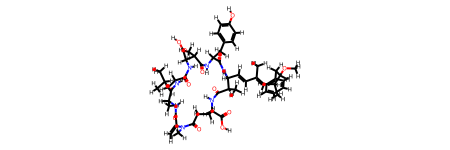

In [37]:
mol

In [27]:
from pathlib import Path
feature_factory = AllChem.BuildFeatureFactory(str(Path(RDConfig.RDDataDir) / "BaseFeatures.fdef"))

In [28]:
features = feature_factory.GetFeaturesForMol(mol)
print(f"Number of features found: {len(features)}")

Number of features found: 62


In [38]:
import collections
feature_frequency = collections.Counter(sorted([feature.GetFamily() for feature in features]))
feature_frequency

Counter({'Acceptor': 13,
         'Aromatic': 2,
         'Donor': 10,
         'Hydrophobe': 32,
         'LumpedHydrophobe': 3,
         'NegIonizable': 2})